In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [3]:
df=pd.concat([train,test],axis=0)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(14204, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The data preprocessing steps to be done

Item_Visibility should not be having 0 as its minimum
In Item_Identifier we can take only starting 2 char and will use for prediction
In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
will convert Outlet_Establishment_Year to the age of the store establishment

# Will check for missing values

In [8]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

Item_Outlet_Sales has no missing values where in test data we dont have the target variable so we are getting the null counts here so we should not treat the target variable [Item_Outlet_Sales]

In [9]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


will treat the missing values

will fill the Item_Weight based on the mean by grouping with the Item_Identifier so that the treatement of missing values will be more efficient

In [10]:
grouped_Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
grouped_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
# now will find the missing data in the Item_Weight column

miss_idx=df[df['Item_Weight'].isnull()].index
miss_idx

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            5627, 5634, 5640, 5643, 5648, 5655, 5656, 5661, 5665, 5669],
           dtype='int64', length=2439)

In [12]:
for i,item in enumerate(df.Item_Identifier):
    if i in miss_idx:
        if item in grouped_Item_Weight.index:
            df['Item_Weight'][i]=grouped_Item_Weight.loc[item]['Item_Weight']

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
# now will impute the missing values which are present in the Outlet_Size by taking the mode because its a categorical variable

grouped_Outlet_Size=df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
grouped_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [16]:
miss_idx_Outlet_Size=df[df['Outlet_Size'].isnull()].index
miss_idx_Outlet_Size

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            5647, 5649, 5650, 5652, 5662, 5668, 5670, 5678, 5679, 5680],
           dtype='int64', length=4016)

In [17]:
for i,item in enumerate(df.Outlet_Type):
    if i in miss_idx_Outlet_Size:
        if item in grouped_Outlet_Size.index:
            df['Outlet_Size'][i]=grouped_Outlet_Size.loc[item]['Outlet_Size']

In [18]:
df['Outlet_Size'].isnull().sum()

0

In [19]:
df1=df.copy(deep=True)

In [20]:
df=df1.copy(deep=True)

In [21]:
df=df.reset_index()

In [22]:
# Now we are going to impute the 0 values in Item_Visibility with the mean of it 

mean_Item_Visibility=round(df['Item_Visibility'].mean(),6)
mean_Item_Visibility

0.065953

In [23]:
idx=df[df['Item_Visibility']==0].index
idx

Int64Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,
               79,
            ...
            14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184,
            14202],
           dtype='int64', length=879)

In [24]:
df.shape

(14204, 13)

In [25]:
df.iloc[idx,:]=df[df['Item_Visibility']==0].replace({0:mean_Item_Visibility})

In [26]:
df[df['Item_Visibility']==0]

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [27]:
# now will take only 2 char from the Item_Identifier

df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
# will work on the typo error in the Item_Fat_Content

df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [29]:
# Now will replace the data accourdingly

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [31]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [32]:
df['New_Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [33]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be outers

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
others     2686
Name: Item_Fat_Content, dtype: int64

In [36]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [37]:
df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,4,NCD19,8.93,others,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [38]:
df2=df.copy(deep=True)

In [39]:
df.drop(['index','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [40]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,4,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,14,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,10,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,6,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,9,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [44]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [45]:
new_df=pd.get_dummies(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier'],data=df,drop_first=True)

In [46]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [47]:
train.shape

(8523, 12)

In [48]:
test.shape

(5681, 11)

In [49]:
# will split the data to train and test

result_test=new_df[new_df['Item_Outlet_Sales'].isnull()]
result_train=new_df[~new_df['Item_Outlet_Sales'].isnull()]

In [50]:
print(result_train.shape,result_test.shape)

(8523, 17) (5681, 17)


In [51]:
X=result_train.drop('Item_Outlet_Sales',axis=1)
y=result_train['Item_Outlet_Sales']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [56]:
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)

MSE_train = 1306659.0989638148
MSE_test = 1143526.6326155325
RMSE_train = 1143.091903113575
RMSE_test = 1069.3580469681483


In [57]:
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

r2_score_train = 0.5582701459538081
r2_score_test = 0.5792718077874299


In [58]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

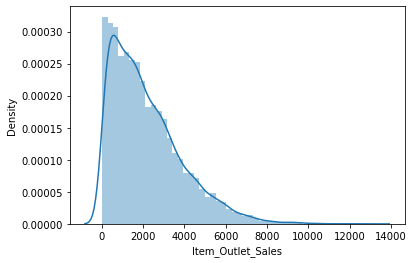

In [59]:
sns.distplot(new_df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

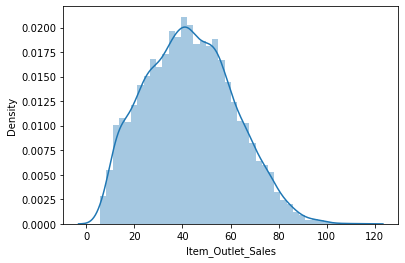

In [60]:
sns.distplot(new_df.Item_Outlet_Sales**(1/2))     # square root transformation 

In [61]:
y=result_train.Item_Outlet_Sales**(1/2)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [63]:
model2=LinearRegression()
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 113.47750250754535
MSE_test = 122.49879322988716
RMSE_train = 10.65258196436645
RMSE_test = 11.067917294138367
r2_score_train = 0.657727455354724
r2_score_test = 0.6497831666281408


In [64]:
from sklearn.ensemble import RandomForestRegressor

model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_train_pred=model3.predict(X_train)
y_test_pred=model3.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 16.725615970230315
MSE_test = 129.8636978955225
RMSE_train = 4.0896963176048065
RMSE_test = 11.395775440729011
r2_score_train = 0.9495519463119154
r2_score_test = 0.6287273380597403


In [65]:
model4=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model4.fit(X_train,y_train)
y_train_pred=model4.predict(X_train)
y_test_pred=model4.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 85.91409981231361
MSE_test = 118.37627362714261
RMSE_train = 9.268985910676184
RMSE_test = 10.880086103847828
r2_score_train = 0.7408646038741156
r2_score_test = 0.6615692073124531


In [66]:
result_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [67]:
result_train.Item_Type.value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [69]:
mod_Item_Type=ols('Item_Outlet_Sales ~ Item_Type',data=result_train).fit()
anova_Item_Type=sm.stats.anova_lm(mod_Item_Type,type=2)
print(anova_Item_Type)

               df        sum_sq       mean_sq         F    PR(>F)
Item_Type     1.0  7.212469e+06  7.212469e+06  2.477119  0.115551
Residual   8521.0  2.481005e+10  2.911636e+06       NaN       NaN


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [71]:
result_train.Item_Outlet_Sales.isnull().sum()

0

In [72]:
tukey_Item_Type=pairwise_tukeyhsd(result_train.Item_Outlet_Sales,result_train.Item_Type,alpha=0.05)
print(tukey_Item_Type)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   251.161 0.8352   -182.986  685.3081  False
     0      2  158.8374 0.9999  -443.3506  761.0255  False
     0      3  272.2237 0.2268   -52.0722  596.5196  False
     0      4  279.5714 0.1728   -40.7806  599.9234  False
     0      5  179.8965   0.81  -124.1786  483.9717  False
     0      6  336.0384  0.005    52.6595  619.4172   True
     0      7  186.2504 0.9921  -274.1552   646.656  False
     0      8   57.0291    1.0  -286.7771  400.8352  False
     0      9  305.8131 0.0406     5.6503  605.9759   True
     0     10  206.0067 0.8589  -158.4947  570.5081  False
     0     11  -26.8315    1.0  -531.2158  477.5528  False
     0     12  373.0947 0.9543  -392.0505 1138.2399  False
     0     13  324.3505 0.0093    39.6723  609.0287   True
     0     14   53.5405    1.0  -305.9802  413.0613  Fal

In [73]:
new_X=X.copy(deep=True)

In [74]:
new_X.drop('Item_Type',axis=1,inplace=True)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42)

In [76]:
model5=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model5.fit(X_train,y_train)
y_train_pred=model5.predict(X_train)
y_test_pred=model5.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 91.73174765348905
MSE_test = 103.94170968668604
RMSE_train = 9.577669218212177
RMSE_test = 10.195180708878388
r2_score_train = 0.7293139847150348
r2_score_test = 0.6837181833523926


In [77]:
result_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [78]:
result_test.reset_index(drop=True,inplace=True)

In [79]:
new_X_train=result_train.drop(['Item_Outlet_Sales','Item_Type'],axis=1)
new_y_train=result_train['Item_Outlet_Sales']
new_X_test=result_test.drop(['Item_Outlet_Sales','Item_Type'],axis=1)

In [80]:
result_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,20.750,0.007565,13,107.8622,NaN,14,0,0,1,0,0,0,1,0,0,1,0
1,8.300,0.038428,4,87.3198,NaN,6,1,0,1,0,1,0,1,0,0,1,0
2,14.600,0.099575,11,241.7538,NaN,15,0,1,0,1,0,1,0,0,0,0,1
3,7.315,0.015388,13,155.0340,NaN,6,0,0,0,1,1,0,1,0,0,1,0
4,8.930,0.118599,4,234.2300,NaN,28,1,0,1,0,0,1,0,0,1,1,0


In [81]:
new_X_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age_of_store',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_others',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Identifier_FD',
       'New_Item_Identifier_NC'],
      dtype='object')

In [82]:
result_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Item_Outlet_Sales', 'age_of_store', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_others', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Identifier_FD',
       'New_Item_Identifier_NC'],
      dtype='object')

In [83]:
result_test.drop(['Item_Type','Item_Outlet_Sales'],axis=1,inplace=True)

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc_x_train=sc.fit_transform(new_X_train)
sc_x_test=sc.transform(result_test)
scaled_x_train=pd.DataFrame(sc_x_train,columns=new_X_train.columns)
scaled_x_test=pd.DataFrame(sc_x_test,columns=new_X_test.columns)
scaled_x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

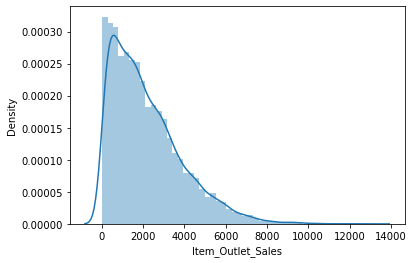

In [85]:
sns.distplot(result_train.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

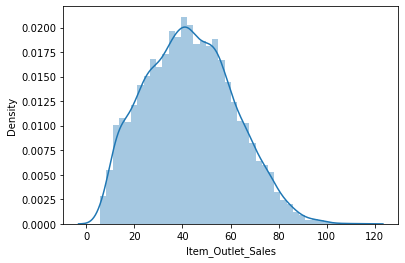

In [86]:
sns.distplot(np.sqrt(result_train.Item_Outlet_Sales)) 

In [87]:
new_y_train=np.sqrt(result_train.Item_Outlet_Sales)

In [88]:
new_y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

In [89]:
print(scaled_x_train.shape,scaled_x_test.shape)

(8523, 15) (5681, 15)


In [90]:
print(new_y_train.shape)

(8523,)


In [91]:
result_test.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,20.750,0.007565,107.8622,14,0,0,1,0,0,0,1,0,0,1,0
1,8.300,0.038428,87.3198,6,1,0,1,0,1,0,1,0,0,1,0
2,14.600,0.099575,241.7538,15,0,1,0,1,0,1,0,0,0,0,1
3,7.315,0.015388,155.0340,6,0,0,0,1,1,0,1,0,0,1,0
4,8.930,0.118599,234.2300,28,1,0,1,0,0,1,0,0,1,1,0


In [92]:
scaled_x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,1.695442,-1.285146,-0.532035,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-0.984502,-0.651927,-0.861920,-1.095190,1.354743,-0.480558,1.504748,-1.238991,1.435383,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
2,0.371614,0.602643,1.618094,-0.020085,-0.738147,2.080915,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,-1.598190,2.080915
3,-1.196530,-1.124629,0.225484,-1.095190,-0.738147,-0.480558,-0.664563,0.807109,1.435383,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,0.992970,1.497272,1.532846,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,-0.349551,2.848773,0.625708,-0.480558


Now we are Performing for the Entire train and test Data

In [93]:
print(scaled_x_train.shape,new_y_train.shape,scaled_x_test.shape)

(8523, 15) (8523,) (5681, 15)


In [94]:
model5.fit(scaled_x_train,new_y_train)
y_train_pred=model5.predict(scaled_x_train)
y_test_pred=model5.predict(scaled_x_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.27729459635324
RMSE_train = 9.606107150992708
r2_score_train = 0.7262086075652995


In [95]:
actual_test_pred=pd.DataFrame((y_test_pred)**2)
actual_test_pred.head(2)

,0
0,1513.702114
1,1266.976529


In [96]:
df_sample = pd.read_csv('sample_submission_8RXa3c6.csv')
df_name = pd.DataFrame(df_sample.values[:,:-1])
df_name.values


array([['FDW58', 'OUT049'],
       ['FDW14', 'OUT017'],
       ['NCN55', 'OUT010'],
       ...,
       ['NCO17', 'OUT045'],
       ['FDJ26', 'OUT017'],
       ['FDU37', 'OUT045']], dtype=object)

In [97]:
Test_predicted = pd.concat([df_name,actual_test_pred],axis=1 )
Test_predicted

,0,1,0
0,FDW58,OUT049,1513.702114
1,FDW14,OUT017,1266.976529
2,NCN55,OUT010,577.609531
3,FDQ58,OUT017,2217.996622
4,FDY38,OUT027,6102.461646
...,...,...,...
5676,FDB58,OUT046,2131.200838
5677,FDD47,OUT018,2327.445756
5678,NCO17,OUT045,1795.074660
5679,FDJ26,OUT017,3630.925196


In [98]:
Test_predicted.columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]

In [99]:
Test_predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1513.702114
1,FDW14,OUT017,1266.976529
2,NCN55,OUT010,577.609531
3,FDQ58,OUT017,2217.996622
4,FDY38,OUT027,6102.461646


In [100]:
Test_predicted.to_csv('final_predicted_data.csv',index = False)

Now Will perform is their any multicolinearity present in the data or not

By using VIF[Variance Inflation Factor]

In [101]:
scaled_x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif=pd.DataFrame()
data_vif['Feature']=scaled_x_train.columns

data_vif['VIF']=[variance_inflation_factor(scaled_x_train.values,i)  for i in range(len(scaled_x_train.columns))]
data_vif

,Feature,VIF
0,Item_Weight,1.006786
1,Item_Visibility,1.107456
2,Item_MRP,1.003568
3,age_of_store,9.041291
4,Item_Fat_Content_Regular,1.222731
5,Item_Fat_Content_others,inf
6,Outlet_Size_Medium,16.538765
7,Outlet_Size_Small,12.819369
8,Outlet_Location_Type_Tier 2,4.548076
9,Outlet_Location_Type_Tier 3,5.389807


In [103]:
X_train=scaled_x_train.copy(deep=True)
X_test=scaled_x_test.copy(deep=True)

In [104]:
X_train.drop(['Item_Fat_Content_others','New_Item_Identifier_NC'],axis=1,inplace=True)

In [105]:
X_test.drop(['Item_Fat_Content_others','New_Item_Identifier_NC'],axis=1,inplace=True)

In [106]:
model5.fit(X_train,new_y_train)
y_train_pred=model5.predict(X_train)
y_test_pred=model5.predict(X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.20688744104073
RMSE_train = 9.602441743694191
r2_score_train = 0.7264175091501877


In [107]:
y_test_pred[:5]**2

array([1523.64142293, 1261.12317525,  564.99501369, 2186.84411619,
       6032.40904565])

In [108]:
Rand = RandomForestRegressor(n_estimators = 500) 
random_forest = Rand.fit(X_train, new_y_train)

In [109]:
data = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': random_forest.feature_importances_*100}).\
                    sort_values('importance', ascending = False)

In [110]:
data

,feature,importance
2,Item_MRP,43.000179
9,Outlet_Type_Supermarket Type1,15.083347
1,Item_Visibility,9.454746
11,Outlet_Type_Supermarket Type3,8.757102
0,Item_Weight,7.219081
5,Outlet_Size_Medium,4.514192
10,Outlet_Type_Supermarket Type2,4.096393
3,age_of_store,3.734950
6,Outlet_Size_Small,1.903577
4,Item_Fat_Content_Regular,0.831570


In [111]:
# we can build the model by keeping only the important features which are contributing more to the target [Status]

important_features=data.feature[data['importance']>1].values
important_features

array(['Item_MRP', 'Outlet_Type_Supermarket Type1', 'Item_Visibility',
       'Outlet_Type_Supermarket Type3', 'Item_Weight',
       'Outlet_Size_Medium', 'Outlet_Type_Supermarket Type2',
       'age_of_store', 'Outlet_Size_Small'], dtype=object)

In [112]:
new_X_train=X_train[important_features]
new_X_test=X_test[important_features]

In [113]:
model5.fit(new_X_train,new_y_train)
y_train_pred=model5.predict(new_X_train)
y_test_pred=model5.predict(new_X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.44396277884759
RMSE_train = 9.614778353079576
r2_score_train = 0.7257140946522443


Now will Perform Hyperparametertuning to imporve the accracy of the model

In [114]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [115]:
grid_search.fit(new_X_train,new_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [116]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [117]:
model6=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=300)
model6.fit(new_X_train,new_y_train)
y_train_pred=model6.predict(new_X_train)
y_test_pred=model6.predict(new_X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 70.9771937912811
RMSE_train = 8.424796364974117
r2_score_train = 0.7894070821622201


In [118]:
y_test_pred[:4]**2

array([1628.39954312, 1246.64814015,  538.59379634, 2082.25721787])

In [119]:
actual_test_pred=pd.DataFrame((y_test_pred)**2)
actual_test_pred.head(2)


,0
0,1628.399543
1,1246.648140


In [120]:
Test_predicted = pd.concat([df_name,actual_test_pred],axis=1 )
Test_predicted


,0,1,0
0,FDW58,OUT049,1628.399543
1,FDW14,OUT017,1246.648140
2,NCN55,OUT010,538.593796
3,FDQ58,OUT017,2082.257218
4,FDY38,OUT027,5668.992833
...,...,...,...
5676,FDB58,OUT046,1909.820765
5677,FDD47,OUT018,2324.027938
5678,NCO17,OUT045,1578.621748
5679,FDJ26,OUT017,3415.589506


In [121]:
Test_predicted.columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]

In [122]:
Test_predicted.to_csv('new_final_predicted_data.csv',index = False)

Now will perform PCA

we want to perform from here if we want to improvise our model till now i got 78.94% accuracy after performing hyperparameter tuning and we have selected only few features to build the model to over come curse of dimentionality

In [123]:
# Performing the PCA
from sklearn.preprocessing import StandardScaler

In [124]:
sc=StandardScaler()

sc_x=sc.fit_transform(new_X)

scaled_x=pd.DataFrame(sc_x,columns=new_X.columns)
scaled_x.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [125]:
from sklearn.decomposition import PCA

pca_bc = PCA(.95, random_state = 100)
pca_data = pca_bc.fit_transform(scaled_x)

In [126]:
df_bc_subset = pd.DataFrame(pca_data, columns= ['PC' + str(i+1) for i in range(10)])
df_bc_subset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.546625,-0.595849,0.451533,-1.750504,0.632935,1.751624,-0.766924,-0.905633,1.468363,-0.815873
1,2.725948,-0.121171,3.264666,-0.142549,-2.149606,0.042695,1.226648,-0.315540,-0.759888,-0.169435
2,-1.177754,-0.512986,-0.253404,-0.831778,0.703973,-0.767666,-0.748790,-1.126242,-0.316998,-0.815964
3,0.505607,-1.224572,-0.338232,0.836059,1.594382,-0.606367,0.968994,-0.258982,-1.680970,-0.034292
4,0.792624,3.384604,-1.080133,0.183364,-1.577650,-0.230825,0.786723,-1.484477,0.389782,1.368417


In [127]:
X=df_bc_subset
y=y

In [128]:
# will split the data into train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
X_train.shape

(6818, 10)

In [130]:
model6=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model6.fit(X_train,y_train)
y_train_pred=model6.predict(X_train)
y_test_pred=model6.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 100.84004884728863
MSE_test = 106.91794662219343
RMSE_train = 10.041914600676936
RMSE_test = 10.340113472404132
r2_score_train = 0.7024368149321355
r2_score_test = 0.6746618610389203


In [133]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [135]:
algos = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(),SVR()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression','RandomForestRegressor','SVR']
rmse_list = []
r2_s = []
r2_t=[]

In [136]:
from sklearn import metrics

for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_train = r2_score(y_train,y_train_pred)
    r2_t.append(r2_train)
    r2 = r2_score(y_test,y_pred)
    r2_s.append(r2)

In [137]:
evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list,'r2_Score Train':r2_t, 'r2_Score': r2_s,})

In [138]:
evaluation

,Model,RMSE,r2_Score Train,r2_Score
0,Linear Regression,11.836822,0.574031,0.573661
1,Ridge Regression,11.836759,0.574031,0.573666
2,Lasso Regression,12.166935,0.548660,0.549550
3,K Neighbors Regression,14.436152,1.000000,0.365857
4,Decision Tree Regression,11.366260,0.734258,0.606885
5,RandomForestRegressor,10.702434,0.948618,0.651462
6,SVR,10.332060,0.662825,0.675168
